# Enemy Survivability 

How long it takes for each weapon to kill an enemy.

## Setting Up

In [1]:
import math
import pandas as pd

%run weapon_full_data.ipynb

## Weapon Damages by Alien

In [2]:
weapon_damages_aliens = weapon_data_aliens.groupby(["weapon", "alien"]).mean()
weapon_damages_aliens = weapon_damages_aliens[["penetrating_damage_expected"]]
weapon_damages_aliens = weapon_damages_aliens.rename(columns={"penetrating_damage_expected": "turn_damage"})
weapon_damages_aliens = weapon_damages_aliens.sort_values(by=["turn_damage"])

## Alien Damage Lists

### Average Damage

In [3]:
weapon_damages_average = weapon_damages_aliens.groupby(["weapon"]).mean()
weapon_damages_average = weapon_damages_average.sort_values(by=["turn_damage"])

In [4]:
weapon_damages_max = weapon_damages_aliens.groupby(["weapon"]).max()
weapon_damages_max = weapon_damages_max.sort_values(by=["turn_damage"])

In [5]:
average_damages_expected = weapon_damages_max.merge(weapon_damages_average, on="weapon")
average_damages_expected = average_damages_expected.rename(columns={"turn_damage_x": "max", "turn_damage_y": "average"})
average_damages_expected = average_damages_expected.sort_values(by=["average"])
average_damages_expected

,max,average
weapon,,
jet_harpoon,10.450000,2.411538
dart_gun,18.480000,5.599529
magna_blast_grenade,18.768750,9.645625
particle_disturbance_grenade,29.493750,14.990938
hidro_jet_cannon,40.516667,20.599968
gas_cannon,38.156250,21.459916
magna_pack_explosive,45.581250,23.447188
heavy_gauss,43.312500,25.149014
aqua_jet_cannon_turret,52.593750,26.654243


Text(0, 0.5, 'Damage')

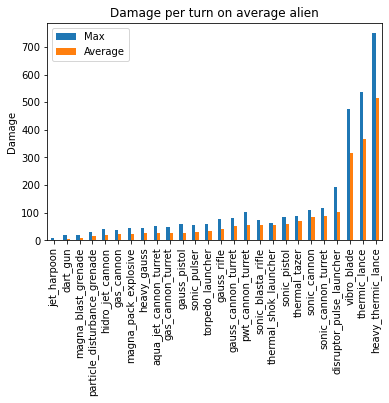

In [6]:
ax = average_damages_expected.plot.bar(title="Damage per turn on average alien", legend=False)
ax.legend(["Max", "Average"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

### Damage Per Time Unit

In [7]:
weapon_damages_per_tu_targets_average = weapon_data_aliens[["weapon", "penetrating_damage_per_time_unit"]]
weapon_damages_per_tu_targets_average = weapon_damages_per_tu_targets_average.groupby(["weapon"]).mean()

In [8]:
weapon_damages_per_tu_targets_max = weapon_data_aliens[["weapon", "penetrating_damage_per_time_unit"]]
weapon_damages_per_tu_targets_max = weapon_damages_per_tu_targets_max.groupby(["weapon"]).max()

In [9]:
weapon_damages_per_tu_targets_expected = weapon_damages_per_tu_targets_max.merge(weapon_damages_per_tu_targets_average, on="weapon")
weapon_damages_per_tu_targets_expected = weapon_damages_per_tu_targets_expected.rename(columns={"penetrating_damage_per_time_unit_x": "max", "penetrating_damage_per_time_unit_y": "average"})
weapon_damages_per_tu_targets_expected = weapon_damages_per_tu_targets_expected.sort_values(by=["average"])
weapon_damages_per_tu_targets_expected

,max,average
weapon,,
jet_harpoon,0.206897,0.047745
dart_gun,0.457143,0.138516
magna_blast_grenade,0.700000,0.359744
hidro_jet_cannon,0.838710,0.426427
particle_disturbance_grenade,1.100000,0.559103
gas_cannon_turret,1.061947,0.596154
gas_cannon,1.072464,0.603177
gauss_pistol,1.285714,0.625824
aqua_jet_cannon_turret,1.250000,0.633494


Text(0, 0.5, 'Ratio')

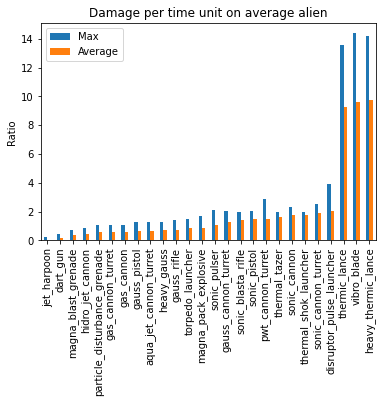

In [10]:
ax = weapon_damages_per_tu_targets_expected.plot.bar(title="Damage per time unit on average alien", legend=False)
ax.legend(["Max", "Average"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Ratio")

### Hits to Kill by Weapon

In [11]:
hits_to_kill_average = weapon_data_aliens[["weapon", "hits_to_kill"]]
hits_to_kill_average = hits_to_kill_average[hits_to_kill_average["hits_to_kill"] < 200]
hits_to_kill_average = hits_to_kill_average.groupby(["weapon"]).mean()
hits_to_kill_average["hits_to_kill"] = hits_to_kill_average.apply(lambda x: math.ceil(x["hits_to_kill"]), axis=1)
hits_to_kill_average = hits_to_kill_average.sort_values(by=["hits_to_kill"])

Text(0, 0.5, 'Hits')

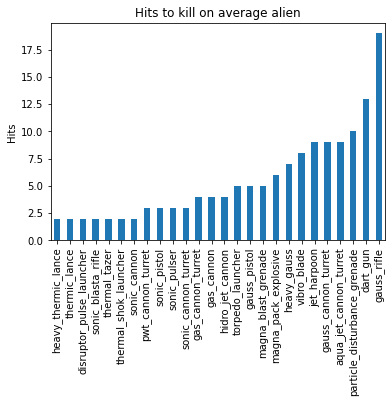

In [12]:
ax = hits_to_kill_average.plot.bar(title="Hits to kill on average alien", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

### Hits to Kill by Alien

In [13]:
hits_to_kill_average = weapon_data_aliens[["alien", "hits_to_kill"]]
hits_to_kill_average = hits_to_kill_average[hits_to_kill_average["hits_to_kill"] < 200]
hits_to_kill_average = hits_to_kill_average.groupby(["alien"]).mean()
hits_to_kill_average["hits_to_kill"] = hits_to_kill_average.apply(lambda x: math.ceil(x["hits_to_kill"]), axis=1)
hits_to_kill_average = hits_to_kill_average.sort_values(by=["hits_to_kill"])

Text(0, 0.5, 'Hits')

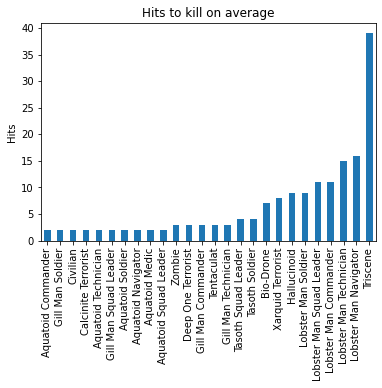

In [14]:
ax = hits_to_kill_average.plot.bar(title="Hits to kill on average", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

### Expected Kills in a Turn

In [15]:
expected_kills = weapon_data_aliens[["weapon", "expected_kills"]]
expected_kills = expected_kills.groupby(["weapon"]).mean()
expected_kills["expected_kills"] = expected_kills.apply(lambda x: math.ceil(x["expected_kills"]), axis=1)
expected_kills = expected_kills.sort_values(by=["expected_kills"])

Text(0, 0.5, 'Kills')

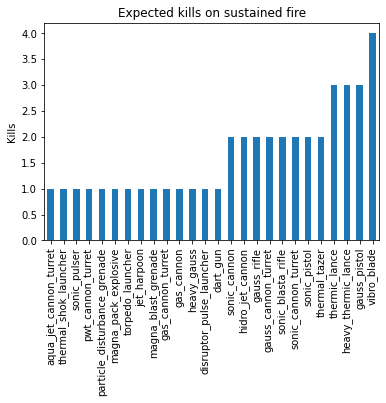

In [16]:
ax = expected_kills.plot.bar(title="Expected kills on sustained fire", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Kills")

### Armor

In [17]:
armor_average = weapon_data_aliens[["alien", "armor"]]
armor_average = armor_average.groupby(["alien"]).mean()
armor_average = armor_average.sort_values(by=["armor"])

Text(0, 0.5, 'Armor')

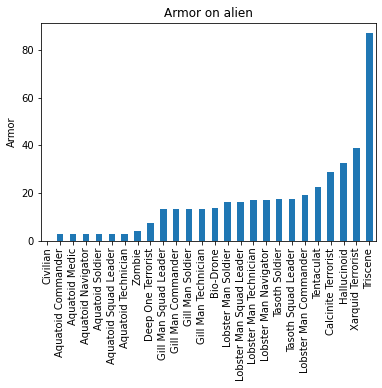

In [18]:
ax = armor_average.plot.bar(title="Armor on alien", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Armor")